<a href="https://colab.research.google.com/github/ulubeykhuja/Amaliyot/blob/main/%D0%9A%D0%BE%D0%BF%D0%B8%D1%8F_%D0%B1%D0%BB%D0%BE%D0%BA%D0%BD%D0%BE%D1%82%D0%B0_%2216_REGRESSIYA_16_18_YAKUNIY_AMALIY_VAZIFA_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![Imgur](https://i.imgur.com/h4PPC71.png)
#**16-modul. Regressiya (Regression)**
# 16.18. Modul boʻyicha yakuniy amaliy vazifa
**Bu vazifa orqali real maʼlumotlarni tozalash, tahlil qilish, regressiya modellari qurish va ularni (MSE, R²) yordamida baholab, eng mos modelni tanlash koʻnikmalariga ega boʻlasiz.**

#**AMALIYOT: yurak kasalligi xavfini bashorat qilish**
#**Vazifa shartlari**

Sizga **Heart Disease Data** dataset beriladi. Bu datasetda bemorlarning turli tibbiy ko‘rsatkichlari (yosh, qon bosimi, xolesterin miqdori va h.k.) mavjud. Maqsad – turli regressiya modellari yordamida **yurak kasalligi (target ustuni)** ehtimolini oldindan bashorat qilish.

#### **1. Ma’lumotlarni yuklash va tahlil qilish**
- **Ma’lumotlarni tozalang**, yetishmayotgan qiymatlar bo‘lsa, ularni to‘g‘rilang.  
- Ustunlar orasidagi **korrelyatsiyani tahlil qiling** va eng muhim omillarni aniqlang.

#### **2. Chiziqli regressiya (Simple Linear Regression)**
- Yurak kasalligi xavfiga eng katta ta’sir ko‘rsatadigan **bitta muhim ustunni** tanlang.  
- Shu ustun asosida **simple linear regression** modeli tuzing.  
- Model natijalarini vizuallashtiring (Matplotlib yoki Seaborn).

#### **3. Ko‘p o‘zgaruvchili regressiya (Multiple Linear Regression)**
- Yurak kasalligi ehtimolini bashorat qilish uchun **bir nechta o‘zgaruvchini tanlang**.  
- **Multiple Linear Regression** modelini qurib, **MSE, R²** kabi baholash mezonlarini hisoblang.  
- Model natijalarini interpretatsiya qiling.

#### **4. Polynomial Regression**
- Yurak kasalligi xavfi va qon bosimi o‘rtasida chiziqli bog‘liqlik yetarli bo‘lmasa, **Polynomial Regression** yordamida bashoratni yaxshilang.  
- **Polynomial darajasini** mos ravishda tanlab, overfitting va underfitting muammolarini tahlil qiling.

#### **5. Non-linear Regression (curve_fit)**
- Yurak kasalligi ehtimolini model qilish uchun nolinear bog‘liqlik mavjudligini aniqlang.  
- `scipy.optimize.curve_fit` funksiyasidan foydalangan holda **eksponensial yoki logaritmik model** tuzing.  
- Modelni baholash uchun **MSE yoki MAE**ʼdan foydalaning.

#### **6. Modelni tanlash va solishtirish**
- Turli regressiya modellarini taqqoslab, **qaysi biri eng yaxshi natija berganini aniqlang**.  

---

### **Bu vazifani bajarish sizga nima beradi?**  
Ushbu vazifa sizga real tibbiy ma’lumotlar bilan ishlash imkoniyatini yaratadi. Regressiya modellarni solishtirib, **qaysi model kasallik xavfini yaxshi bashorat qilishini** aniqlaysiz.  



Ushbu **Heart Disease Data** datasetida quyidagi ustunlar mavjud. Har bir ustunning ma’nosi va qanday turdagi ma’lumot ekanini tushuntirib o‘tamiz:  

---

### **Ustunlar tavsifi**  

| **Ustun nomi**  | **Tavsifi** | **Ma’lumot turi** |
|-----------------|------------|-------------------|
| **age**         | Bemorning yoshi | Raqamli (Integer) |
| **sex**         | Jinsi (Male = erkak, Female = ayol) | String |
| **cp** (Chest Pain Type) | Ko‘krak qafasidagi og‘riq turi: <br> - 1: Typical Angina <br> - 2: Atypical Angina <br> - 3: Non-anginal Pain <br> - 4: Asymptomatic | Nominal (1,2,3,4) |
| **trestbps** (Resting Blood Pressure) | Dam olish vaqtida qon bosimi (mm Hg) | Raqamli |
| **chol** (Cholesterol) | Qondagi umumiy xolesterin miqdori (mg/dl) | Raqamli |
| **fbs** (Fasting Blood Sugar) | Qondagi shakar darajasi (≥ 120 mg/dl bo‘lsa, True, aks holda False) | Boolean (0/1) |
| **restecg** (Resting ECG) | Yurakning elektrokardiogramma natijasi: <br> - 0: Normal <br> - 1: ST-T Wave abnormality <br> - 2: Left Ventricular Hypertrophy | Nominal (0,1,2) |
| **thalach** (Max Heart Rate) | Maksimal yurak urish tezligi | Raqamli |
| **exang** (Exercise-Induced Angina) | Mashq qilish davomida angina bo‘ladimi? (1 = Ha, 0 = Yo‘q) | Boolean (0/1) |
| **oldpeak** | ST depressiyasi: EKG bo‘yicha yurakning dam olish va mashqdan keyingi o‘zgarishi | Raqamli |
| **slope** | ST segmentining tendensiyasi: <br> - 0: Downsloping <br> - 1: Flat <br> - 2: Upsloping | Nominal (0,1,2) |
| **ca** | Tomirlardagi kalsiy miqdori (0–3 oralig‘ida) | Raqamli |
| **thal** | Thalassemia turi: <br> - 1 = Normal <br> - 2 = Fixed defect <br> - 3 = Reversible defect | Nominal (1,2,3) |
| **num** | Yurak kasalligi mavjudligi ([0,1,2,3,4]) | Raqamli |

**num** ustunidagi raqamlar maʼnosi:

| `num` qiymati | Ma’nosi |
|--------------|--------|
| **0**  | Yurak kasalligi yo‘q |
| **1**  | Yengil darajadagi yurak kasalligi |
| **2**  | O‘rta darajadagi yurak kasalligi |
| **3**  | Og‘ir darajadagi yurak kasalligi |
| **4**  | Juda og‘ir yurak kasalligi |



###*** ESLATMA**. *Ushbu amaliy vazifada siz oʻtmagan mavzulardan ham savollar va vazifalar boʻlishi mumkin! Bu savollarni mustaqil oʻrganishingiz kerak boʻladi. Bunday vazifalar mustaqil izlanish koʻnikmangizni oshirish uchun tayyorlandi!*

In [2]:
import pandas as pd
import numpy as np
import sklearn

url = "https://raw.githubusercontent.com/alishermutalov/praktikum-datasets/refs/heads/praktikum/heart_disease_uci_dataset.csv"
df = pd.read_csv(url, index_col='id')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
id,,,,,,,,,,,,,,
1,63,Male,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
2,67,Male,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
3,67,Male,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
4,37,Male,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
5,41,Female,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


1. Ma’lumotlarni yuklash va tahlil qilish
Ma’lumotlarni tozalang, yetishmayotgan qiymatlar bo‘lsa, ularni to‘g‘rilang.
Ustunlar orasidagi korrelyatsiyani tahlil qiling va eng muhim omillarni aniqlang.

In [3]:
print((df.isnull().sum() / len(df)) * 100)

# 40% dan ortiq NAN  bo‘lsa, ustunni o'cbhiramiz:
to_drop = [col for col in df.columns if df[col].isnull().sum()/len(df) > 0.4]
df = df.drop(columns=to_drop)

# Qolgan null qiymatlarni ustun tipiga qarab to‘ldiramiz:
for col in df.columns:
    if df[col].dtype == 'float64' or df[col].dtype == 'int64':
        df[col] = df[col].fillna(df[col].median())
    else:
        df[col] = df[col].fillna(df[col].mode()[0])

age          0.000000
sex          0.000000
cp           0.000000
trestbps     6.413043
chol         3.260870
fbs          9.782609
restecg      0.217391
thalch       5.978261
exang        5.978261
oldpeak      6.739130
slope       33.586957
ca          66.413043
thal        52.826087
num          0.000000
dtype: float64


/tmp/ipython-input-3-1844734155.py:12: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[col] = df[col].fillna(df[col].mode()[0])


In [4]:
df.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalch,0
exang,0
oldpeak,0


In [5]:
df.sample(3)

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,num
id,,,,,,,,,,,,
657,56,Male,asymptomatic,120.0,0.0,False,st-t abnormality,100.0,True,-1.0,downsloping,2
823,48,Male,non-anginal,102.0,0.0,False,st-t abnormality,110.0,True,1.0,downsloping,1
800,64,Female,asymptomatic,142.0,276.0,False,normal,140.0,True,1.0,flat,1


In [8]:
cat_cols = df.select_dtypes(include=['object', 'category', 'bool']).columns
for col in cat_cols:
    print(f"{col}: {df[col].nunique()} ta unique qiymat", df[col].unique())

sex: 2 ta unique qiymat ['Male' 'Female']
cp: 4 ta unique qiymat ['typical angina' 'asymptomatic' 'non-anginal' 'atypical angina']
fbs: 2 ta unique qiymat [ True False]
restecg: 3 ta unique qiymat ['lv hypertrophy' 'normal' 'st-t abnormality']
exang: 2 ta unique qiymat [False  True]
slope: 3 ta unique qiymat ['downsloping' 'flat' 'upsloping']


In [9]:
# sex ustunini sonli qiymatga almashtirish
df['sex'] = df['sex'].map({
    'Male': 1,
    'Female': 0
})

# cp ustunini sonli qiymatga almashtirish
df['cp'] = df['cp'].map({
    'typical angina': 1,
    'atypical angina': 2,
    'non-anginal': 3,
    'asymptomatic': 4
})

# restecg ustunini sonli qiymatga almashtirish
df['restecg'] = df['restecg'].map({
    'lv hypertrophy': 2,
    'normal': 0,
    'st-t abnormality':1
})


# slope ustunini sonli qiymatga almashtirish
df['slope'] = df['slope'].map({
    'downsloping': 0,
    'flat': 1,
    'upsloping': 2
})

In [10]:
df.describe()

,age,sex,cp,trestbps,chol,restecg,thalch,oldpeak,slope,num
count,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000
mean,53.510870,0.789130,3.250000,131.995652,199.908696,0.603261,137.692391,0.853261,1.152174,0.995652
std,9.424685,0.408148,0.930969,18.451300,109.040171,0.805443,25.145235,1.058049,0.516007,1.142693
min,28.000000,0.000000,1.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000,0.000000
25%,47.000000,1.000000,3.000000,120.000000,177.750000,0.000000,120.000000,0.000000,1.000000,0.000000
50%,54.000000,1.000000,4.000000,130.000000,223.000000,0.000000,140.000000,0.500000,1.000000,1.000000
75%,60.000000,1.000000,4.000000,140.000000,267.000000,1.000000,156.000000,1.500000,1.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,603.000000,2.000000,202.000000,6.200000,2.000000,4.000000


num         1.000000
oldpeak     0.411588
cp          0.397896
exang       0.350567
age         0.339596
sex         0.259342
restecg     0.139997
fbs         0.129539
trestbps    0.113178
slope      -0.201875
chol       -0.230539
thalch     -0.349173
Name: num, dtype: float64


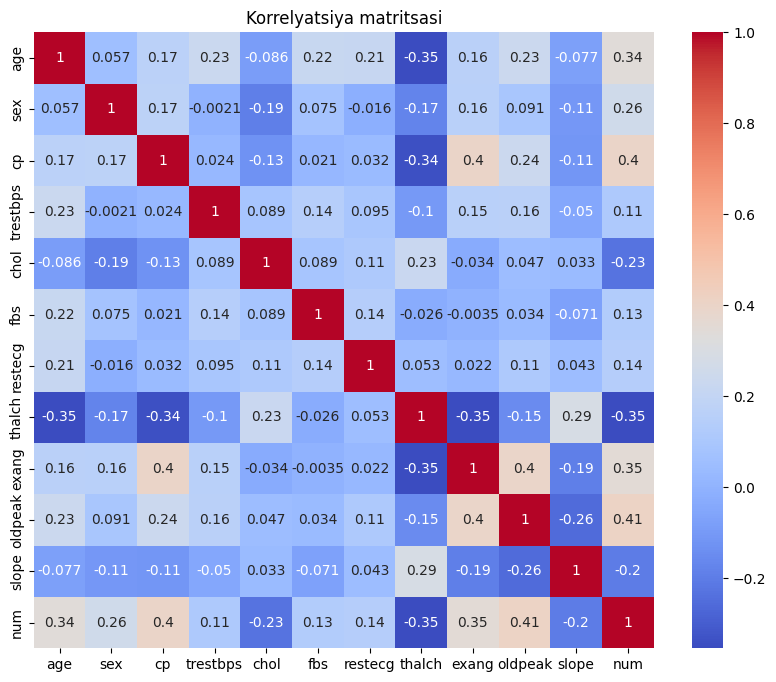

In [11]:
# corr  matritsasini tuzish
corr_matrix = df.corr()

# eng kuchli bog‘liq ustunlar
print(corr_matrix['num'].sort_values(ascending=False))

# Vizualizatsiya
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Korrelyatsiya matritsasi")
plt.show()

## 2. Chiziqli regressiya (Simple Linear Regression)
* Yurak kasalligi xavfiga eng katta ta’sir ko‘rsatadigan bitta muhim ustunni tanlang.
* Shu ustun asosida simple linear regression modeli tuzing.
* Model natijalarini vizuallashtiring (Matplotlib yoki Seaborn).

In [20]:
df.sample(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,num
id,,,,,,,,,,,,
486,59,1,4,140.0,223.0,False,0,140.0,False,0.0,1,0
713,68,1,4,145.0,0.0,False,0,136.0,False,1.8,2,1
334,39,0,3,110.0,182.0,False,1,180.0,False,0.0,1,0
219,64,0,4,130.0,303.0,False,0,122.0,False,2.0,1,0
174,62,0,4,140.0,394.0,False,2,157.0,False,1.2,1,0


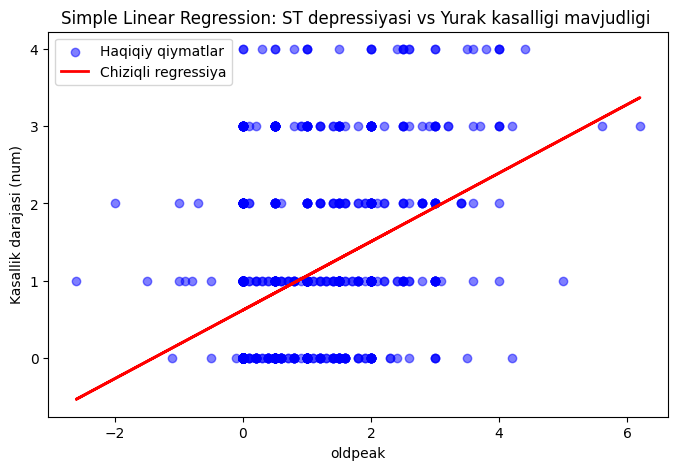

Regression tenglama: num = 0.44 * oldpeak + 0.62


In [29]:
from sklearn.linear_model import LinearRegression

X = df[['oldpeak']].values
y = df['num'].values

# Modelni yarsash & train
model = LinearRegression()
model.fit(X, y)

# predict qiymatlari
y_pred = model.predict(X)

# visualizasiya
plt.figure(figsize=(8,5))
plt.scatter(X, y, color='blue', label='Haqiqiy qiymatlar', alpha=0.5)
plt.plot(X, y_pred, color='red', linewidth=2, label='Chiziqli regressiya')
plt.xlabel('oldpeak')
plt.ylabel('Kasallik darajasi (num)')
plt.title('Simple Linear Regression: ST depressiyasi vs Yurak kasalligi mavjudligi ')
plt.legend()
plt.show()

# Model koeffitsientlari va intercept
print(f"Regression tenglama: num = {model.coef_[0]:.2f} * oldpeak + {model.intercept_:.2f}")

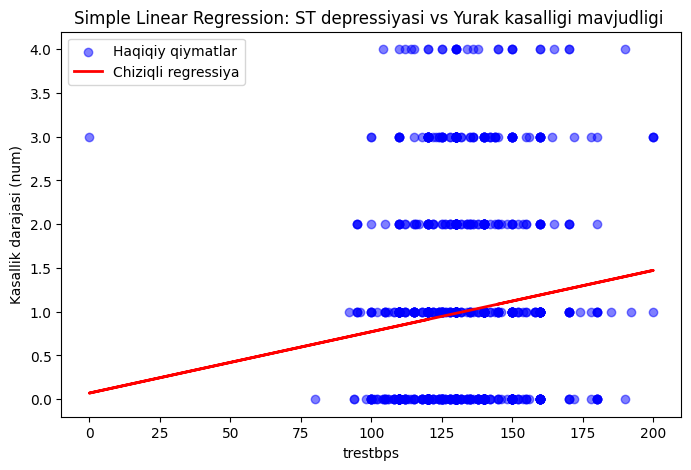

Regression tenglama: num = 0.01 * trestbps + 0.07


In [27]:
from sklearn.linear_model import LinearRegression

X = df[['trestbps']].values
y = df['num'].values

# Modelni yarsash & train
model = LinearRegression()
model.fit(X, y)

# predict qiymatlari
y_pred = model.predict(X)

# visualizasiya
plt.figure(figsize=(8,5))
plt.scatter(X, y, color='blue', label='Haqiqiy qiymatlar', alpha=0.5)
plt.plot(X, y_pred, color='red', linewidth=2, label='Chiziqli regressiya')
plt.xlabel('trestbps')
plt.ylabel('Kasallik darajasi (num)')
plt.title('Simple Linear Regression: ST depressiyasi vs Yurak kasalligi mavjudligi ')
plt.legend()
plt.show()

# Model koeffitsientlari va intercept
print(f"Regression tenglama: num = {model.coef_[0]:.2f} * trestbps + {model.intercept_:.2f}")

In [26]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalch',
       'exang', 'oldpeak', 'slope', 'num'],
      dtype='object')

In [30]:
from sklearn.metrics import mean_absolute_error, r2_score

# MAE hisoblash
mae = mean_absolute_error(y, y_pred)
print(f"MAE (Mean Absolute Error): {mae:.3f}")

# R2 hisoblash
r2 = r2_score(y, y_pred)
print(f"R² (Determination coefficient): {r2:.3f}")

MAE (Mean Absolute Error): 0.841
R² (Determination coefficient): 0.169


Chiziqli bog‘liqlik zaif.


## Ko‘p o‘zgaruvchili regressiya (Multiple Linear Regression)
* Yurak kasalligi ehtimolini bashorat qilish uchun bir nechta o‘zgaruvchini tanlang.
* Multiple Linear Regression modelini qurib, MSE, R² kabi baholash mezonlarini hisoblang.
* Model natijalarini interpretatsiya qiling.

In [31]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# X va y
X = df[['oldpeak', 'cp', 'exang', 'age', 'thalch', 'sex']]
y = df['num']

# Model
mlr = LinearRegression()
mlr.fit(X, y)

# Bashorat
y_pred = mlr.predict(X)

# Baholash mezonlari
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)

print(f"Mean Squared Error (MSE): {mse:.3f}")
print(f"Determination coefficient (R²): {r2:.3f}")

# Har bir o‘zgaruvchining modeldagi ahamiyati (koeffitsienti)
for col, coef in zip(X.columns, mlr.coef_):
    print(f"{col}: {coef:.3f}")

Mean Squared Error (MSE): 0.835
Determination coefficient (R²): 0.360
oldpeak: 0.282
cp: 0.259
exang: 0.153
age: 0.022
thalch: -0.006
sex: 0.441


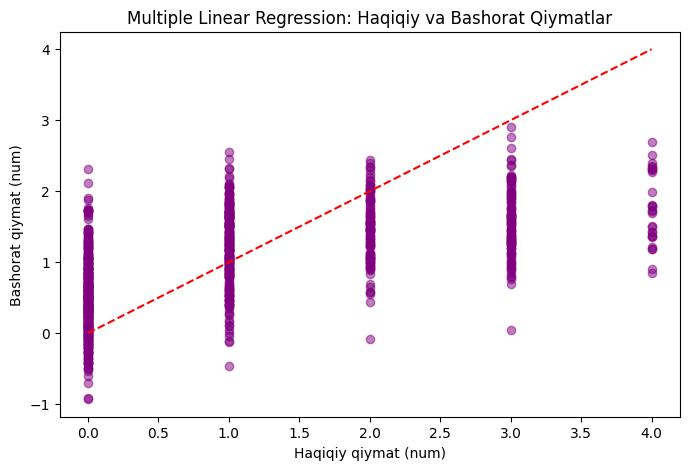

In [32]:
plt.figure(figsize=(8,5))
plt.scatter(y, y_pred, color='purple', alpha=0.5)
plt.xlabel('Haqiqiy qiymat (num)')
plt.ylabel('Bashorat qiymat (num)')
plt.title('Multiple Linear Regression: Haqiqiy va Bashorat Qiymatlar')
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--')
plt.show()

## 4. Polynomial Regression
* Yurak kasalligi xavfi va qon bosimi o‘rtasida chiziqli bog‘liqlik yetarli bo‘lmasa, Polynomial Regression yordamida bashoratni yaxshilang.
* Polynomial darajasini mos ravishda tanlab, overfitting va underfitting muammolarini tahlil qiling.

In [33]:
from sklearn.preprocessing import PolynomialFeatures

X = df[['trestbps']].values  # Qon bosimi
y = df['num'].values         # Yurak kasalligi darajasi


In [34]:
lin_reg = LinearRegression()
lin_reg.fit(X, y)
y_pred_linear = lin_reg.predict(X)
mse_linear = mean_squared_error(y, y_pred_linear)
r2_linear = r2_score(y, y_pred_linear)

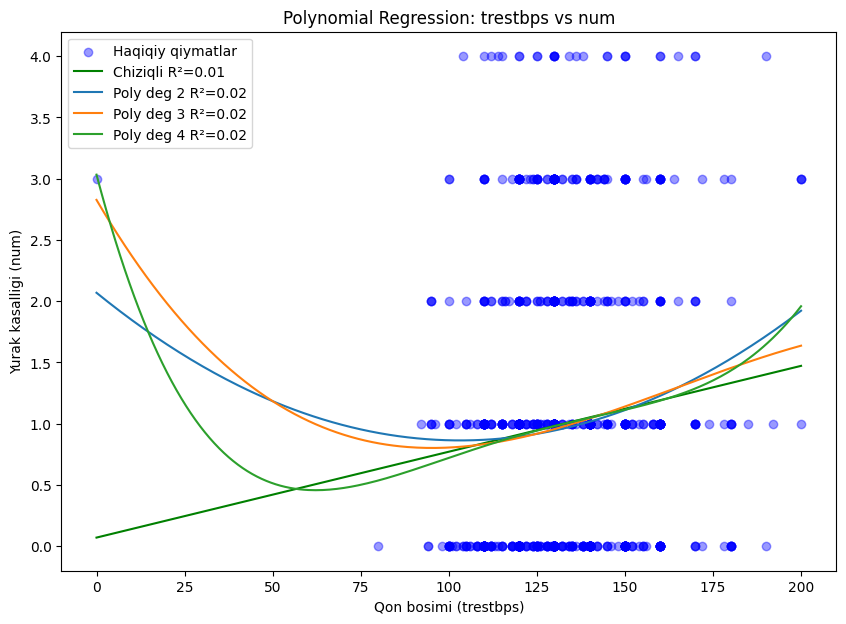

In [36]:
degrees = [2, 3, 4]
mses = {}
r2s = {}

plt.figure(figsize=(10, 7))
plt.scatter(X, y, color="blue", alpha=0.4, label="Haqiqiy qiymatlar")

# Chiziqli regressiya chizig'i
x_axis = np.linspace(X.min(), X.max(), 300).reshape(-1, 1)
plt.plot(x_axis, lin_reg.predict(x_axis), color='green', label=f"Chiziqli R²={r2_linear:.2f}")

for d in degrees:
    poly = PolynomialFeatures(degree=d)
    X_poly = poly.fit_transform(X)
    poly_reg = LinearRegression().fit(X_poly, y)
    y_poly = poly_reg.predict(poly.transform(x_axis))
    mse = mean_squared_error(y, poly_reg.predict(X_poly))
    r2 = r2_score(y, poly_reg.predict(X_poly))
    mses[d] = mse
    r2s[d] = r2
    plt.plot(x_axis, y_poly, label=f"Poly deg {d} R²={r2:.2f}")

plt.xlabel("Qon bosimi (trestbps)")
plt.ylabel("Yurak kasalligi (num)")
plt.title("Polynomial Regression: trestbps vs num")
plt.legend()
plt.show()

Non-linear Regression (curve_fit)
* Yurak kasalligi ehtimolini model qilish uchun nolinear bog‘liqlik mavjudligini aniqlang.
* scipy.optimize.curve_fit funksiyasidan foydalangan holda eksponensial yoki logaritmik model tuzing.
* Modelni baholash uchun MSE yoki MAEʼdan foydalaning.

In [38]:
from scipy.optimize import curve_fit

# Eksponensial model:
def exp_model(x, a, b, c):
    return a * np.exp(b * x) + c

# Logaritmik model
def log_model(x, a, b):
    return a * np.log(x) + b

In [40]:
X = df['oldpeak'].values
y = df['num'].values

X_log = X + 1 - X.min()

In [41]:
params_exp, _ = curve_fit(exp_model, X, y, maxfev=10000)
y_pred_exp = exp_model(X, *params_exp)
mse_exp = mean_squared_error(y, y_pred_exp)
mae_exp = mean_absolute_error(y, y_pred_exp)

In [44]:
# X_log ni ishlatamiz (agar kerak bo‘lsa)
params_log, _ = curve_fit(log_model, X_log, y, maxfev=10000)
y_pred_log = log_model(X_log, *params_log)
mse_log = mean_squared_error(y, y_pred_log)
mae_log = mean_absolute_error(y, y_pred_log)

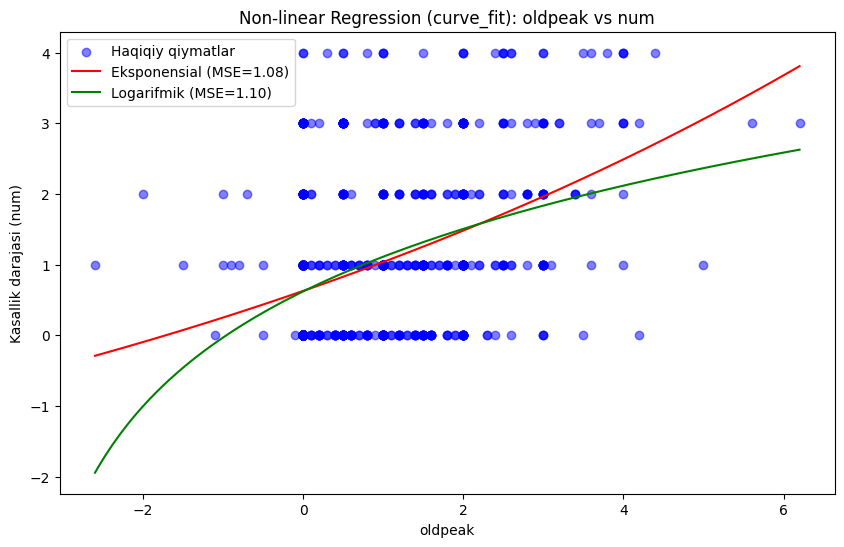

In [47]:
plt.figure(figsize=(10,6))
plt.scatter(X, y, label='Haqiqiy qiymatlar', color='blue', alpha=0.5)

# Eksponensial chiziq
x_axis = np.linspace(X.min(), X.max(), 200)
plt.plot(x_axis, exp_model(x_axis, *params_exp), color='red', label=f"Eksponensial (MSE={mse_exp:.2f})")

# Logaritmik chiziq (X_log ni ishlatish!)
plt.plot(x_axis, log_model(x_axis + 1 - X.min(), *params_log), color='green', label=f"Logarifmik (MSE={mse_log:.2f})")

plt.xlabel('oldpeak')
plt.ylabel('Kasallik darajasi (num)')
plt.title('Non-linear Regression (curve_fit): oldpeak vs num')
plt.legend()
plt.show()

In [48]:
print(f"Eksponensial model: MSE = {mse_exp:.3f}, MAE = {mae_exp:.3f}")
print(f"Logarifmik model: MSE = {mse_log:.3f}, MAE = {mae_log:.3f}")
print(f"Eksponensial model parametrlari: {params_exp}")
print(f"Logarifmik model parametrlari: {params_log}")

Eksponensial model: MSE = 1.082, MAE = 0.840
Logarifmik model: MSE = 1.102, MAE = 0.852
Eksponensial model parametrlari: [ 4.7420332   0.08280291 -4.11375066]
Logarifmik model parametrlari: [ 2.00365156 -1.9453483 ]


Modelni tanlash va solishtirish
* Turli regressiya modellarini taqqoslab, qaysi biri eng yaxshi natija berganini aniqlang.

Eng yaxshi model:
Ko‘p o‘zgaruvchili chiziqli regressiya (Multiple Linear Regression) eng yaxshi natija berdi (R² = 0.36, MSE = 0.835).
Boshqa regressiya modellari (polynomial, eksponensial, logarifmik) bu muammoda yaxshi ishlamadi.
Bitta o‘zgaruvchili modellarning barchasi (linear/polynomial/nolinear) juda past natija berdi.